# Part 1 - Exploring ML techniques for classification tasks (30 marks)

## 3.1 Dataset
For this part of the assignment, we will use the training.csv and testing.csv data files supplied on LMS
for this assignment. These files were downloaded and slightly modified from the Forest type mapping
dataset on the UCI Machine Learning website. Please look at the link below:

http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping#

for the description about this dataset. Please do not download the original dataset from the UCI ML
website above. You should use the two csv files supplied on LMS for this labsheet. You should save both
csv files to the same directory with your assignment1.ipynb file.

The training set (training.csv) contains 325 instances instances of multivariate remote sensing data
of some forest areas in Japan. There are 4 different forest types labelled in the first column (the column
heading is ‘class’), as described in the link above. The test set (testing.csv) has the same format as
training.csv and contains 198 test instances.

## 3.2 Tasks - Binary Classification
**1. Read in the contents of both csv files. Inspect what the columns are by displaying the first few lines of the file.**

In [34]:
import csv
import numpy as np
import pandas as pd

# Setting appropriate filenames
training_file = 'training.csv'
testing_file = 'testing.csv'

# Open training data
with open(training_file) as training_csv:
    training_reader = csv.reader(training_csv, delimiter = ",")
    training_data = np.array(list(training_reader))
    
# Open testing data
with open(testing_file) as testing_csv:
    testing_reader = csv.reader(testing_csv, delimiter = ",")
    testing_data = np.array(list(testing_reader))

In [35]:
# Changing the training data to a pandas dataframe
training_data = pd.DataFrame(training_data)
header = training_data.iloc[0] # Setting first line as the header
training_data = training_data[1:]
training_data.columns = header

# Changing the testing data to a pandas dataframe
testing_data = pd.DataFrame(testing_data)
header = testing_data.iloc[0] # Setting first line as the header
testing_data = testing_data[1:]
testing_data.columns = header

# Inspecting the firt 5 lines of the testing data
print("A table of the first 5 lines of training data can be seen below:")
training_data.head(5).T # Tranposing to make more readable

A table of the first 5 lines of training data can be seen below:


,1,2,3,4,5
0,,,,,
class,d,s,s,d,s
b1,67,67,63,63,46
b2,51,28,26,42,27
b3,68,51,50,63,50
b4,115,99,95,97,83
b5,69,50,49,66,51
b6,111,97,91,108,90
b7,136,82,81,111,76
b8,31,26,26,28,26


**2. To simplify the classification task, write Python code to remove all the columns whose names begin with pred_minus_obs. You should only have 9 features (b1, b2, ..., b9) left for both the training and test sets.**

In [36]:
# Removing all columns with the pred_minus_obs prefix
training_data = training_data[training_data.columns.drop(list(training_data.filter(regex='pred_minus_obs')))]
testing_data = testing_data[testing_data.columns.drop(list(testing_data.filter(regex='pred_minus_obs')))]

# Checking that only the class and b columns are remaining:
print("A preview of the training data with the remaining columns:")
training_data.head(5)

A preview of the training data with the remaining columns:


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
1,d,67,51,68,115,69,111,136,31,67
2,s,67,28,51,99,50,97,82,26,59
3,s,63,26,50,95,49,91,81,26,57
4,d,63,42,63,97,66,108,111,28,59
5,s,46,27,50,83,51,90,76,26,56


**3. Use appropriate functions to display (visualise) the different features (or attributes/columns). Display some plots for visualising the data. Describe what you see in your markdown cells.**

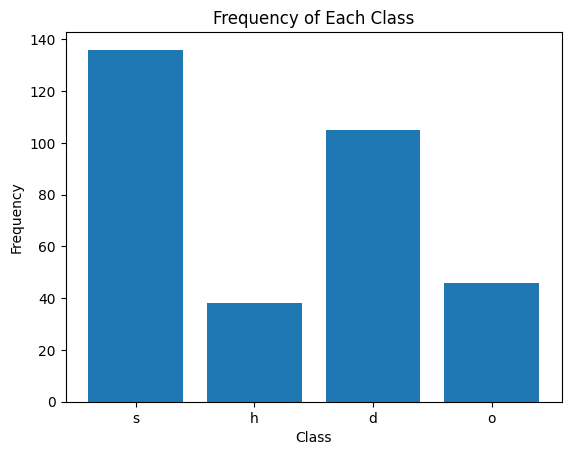

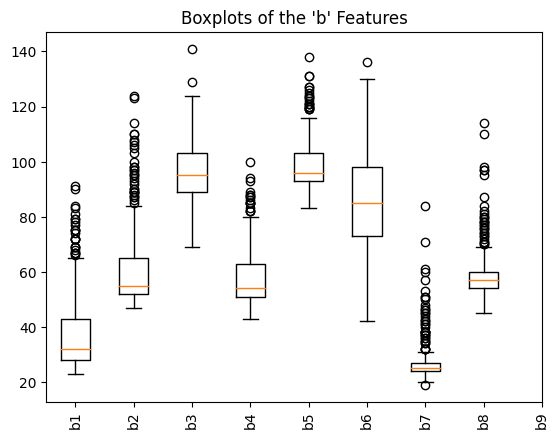

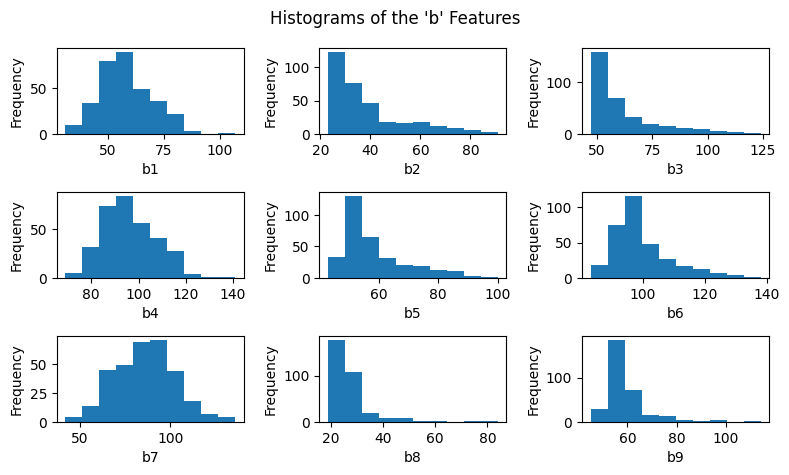

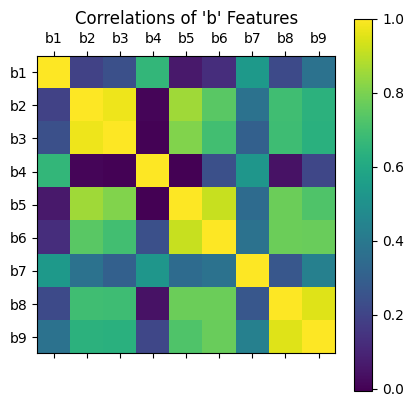

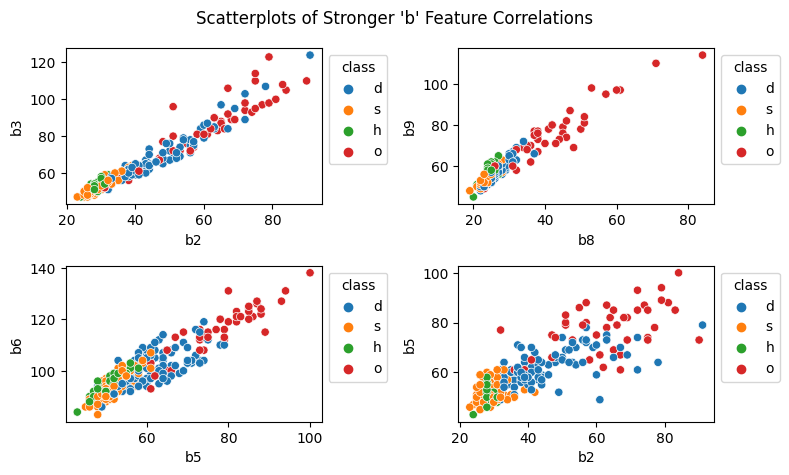

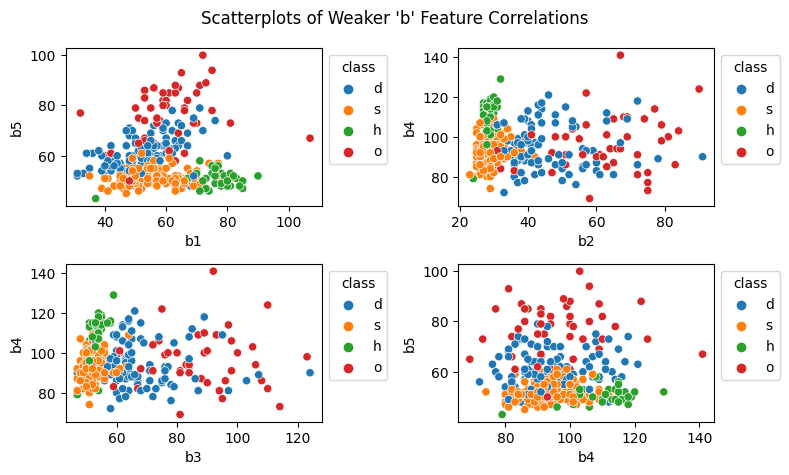

All b features plotted against one another:


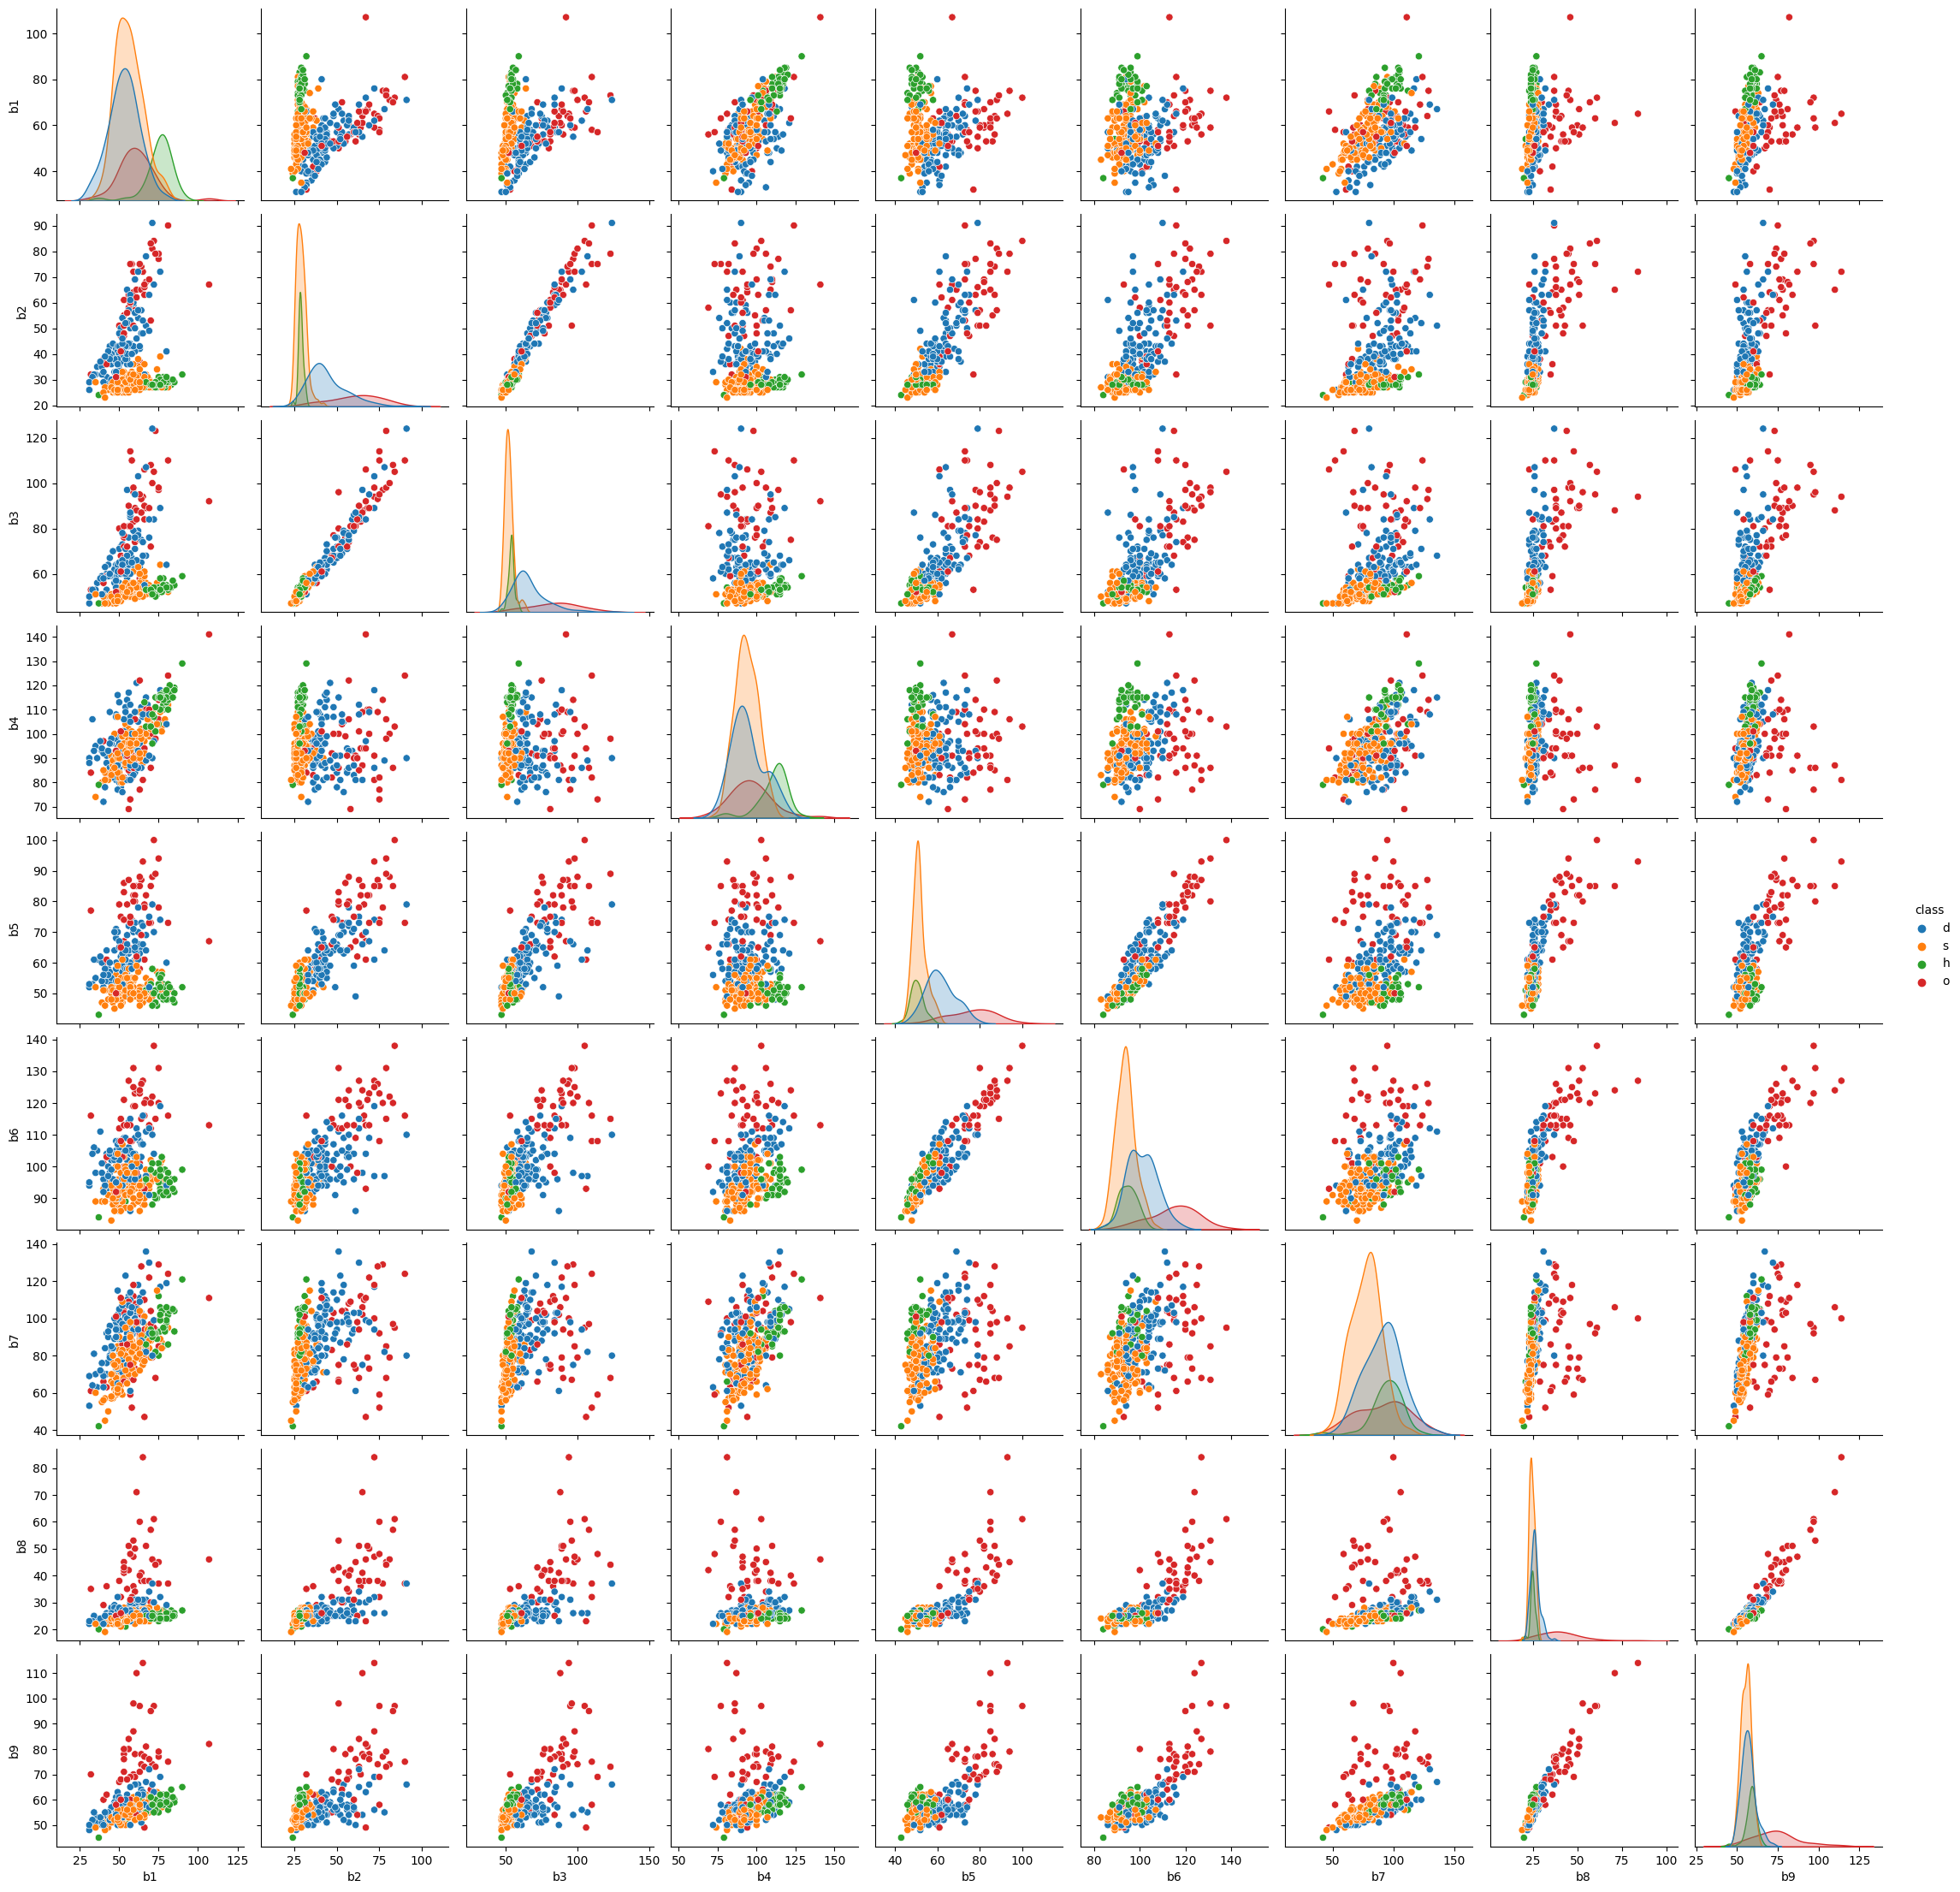

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the frequency of each class present

class_values = list(training_data.iloc[:, 0]) # Collating together the different classes
classes = list(set(class_values))

class_counts = [] # Determing the count of each class
for item in classes:
    class_counts.append(class_values.count(item))

plt.bar(classes, class_counts) # Plotting the bar chart of class frequencies
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequency of Each Class")
plt.show()

# Gathering data for each of the 'b' values

attribute_values_combined = [] # Store all attributes in 1 list

for attribute in training_data.loc[:, training_data.columns != 'class']:
    training_data[attribute] = pd.to_numeric(training_data[attribute]) # Change each column to be numeric
    attribute_values_combined.append(list(training_data[attribute])) # Take the data associated with each attribute
attribute_values_combined = attribute_values_combined[1:] # Remove the class attribute

# Plotting boxplots of the 'b' values
plt.boxplot(attribute_values_combined)
plt.xticks(range(1,10), training_data.loc[:, training_data.columns != 'class'], rotation=90)
plt.title("Boxplots of the 'b' Features")
plt.show()

# Plotting some of the features in the 'b' group against oneanother

row = 0
column = 0
fig, axs = plt.subplots(3, 3)
fig.set_figwidth(8)
fig.suptitle("Histograms of the 'b' Features")

# Setting non-class features to a numerical type
for feature in training_data:
    if feature != 'class':
        axs[row, column].hist(training_data[feature])
        axs[row, column].set_xlabel(feature, size=10)
        axs[row, column].set_ylabel('Frequency')
        column += 1
        if column == 3:
            row += 1
            column = 0

plt.tight_layout()

# Plot correlation matrix to check correlations between 'b' values
plt.matshow(training_data.loc[:, training_data.columns != 'class'].corr()) # Plot everything that isn't the class attribute
plt.title("Correlations of 'b' Features")
plt.colorbar()
plt.xticks(range(0, 9), training_data.loc[:, training_data.columns != 'class'])
plt.yticks(range(0, 9), training_data.loc[:, training_data.columns != 'class'])
plt.show()

# Plot scatter plots of the 'b' features with stronger correlations

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.suptitle("Scatterplots of Stronger 'b' Feature Correlations")

sns.scatterplot(training_data, x='b2', y='b3', hue='class', ax=axs[0, 0])
axs[0, 0].legend(bbox_to_anchor=[1, 1], title='class')
sns.scatterplot(training_data, x='b8', y='b9', hue='class', ax=axs[0, 1])
axs[0, 1].legend(bbox_to_anchor=[1, 1], title='class')
sns.scatterplot(training_data, x='b5', y='b6', hue='class', ax=axs[1, 0])
axs[1, 0].legend(bbox_to_anchor=[1, 1], title='class')
sns.scatterplot(training_data, x='b2', y='b5', hue='class', ax=axs[1, 1])
axs[1, 1].legend(bbox_to_anchor=[1, 1], title='class')
plt.tight_layout()
plt.show()

# Plot scatter plots of the 'b' features with weaker correlations

fig2, axs2 = plt.subplots(2, 2)
fig2.set_figwidth(8)
fig2.suptitle("Scatterplots of Weaker 'b' Feature Correlations")

sns.scatterplot(training_data, x='b1', y='b5', hue='class', ax=axs2[0, 0])
axs2[0, 0].legend(bbox_to_anchor=[1, 1], title='class')
sns.scatterplot(training_data, x='b2', y='b4', hue='class', ax=axs2[0, 1])
axs2[0, 1].legend(bbox_to_anchor=[1, 1], title='class')
sns.scatterplot(training_data, x='b3', y='b4', hue='class', ax=axs2[1, 0])
axs2[1, 0].legend(bbox_to_anchor=[1, 1], title='class')
sns.scatterplot(training_data, x='b4', y='b5', hue='class', ax=axs2[1, 1])
axs2[1, 1].legend(bbox_to_anchor=[1, 1], title='class')
plt.tight_layout()
plt.show()

print("All b features plotted against one another:")
sns.pairplot(training_data, hue='class')
plt.show()

Looking at the bar chart showing the frequency of each class type, we can see that the classes are not uniformly distributed. The 's' class has the largest frequency, followed by the 'd' class with the 'o' and 'h' classes having the lowest frequencies ('h' the lowest of all).

From the boxplots of the 'b' features, we can see that the majority of the 'b' features (excluding b3 and b6) have a large number of outliers at the higher end of their spectrum, with none at the lower end (except for b7). We can also see that there is a fairly large degree of variance in terms of the medians and spreads of the different 'b' features. b6 appears to have the largest spread, while b7 has the lowest (although has a large number of outliers).

Examining the histograms of the 'b' features, we can see that b1, b4 and b7 are approximatley normally distributed, while the other 'b' features show a distributed highly skewed to the left (lower values), with tails to the right.

From the correlation matrix, we can see that a number of features are highly correlated with other features, while some show a very weak correlation. This is further explored in the scatterplots, which show a fairly strong correlation between b2 and b3, b8 and b9, b5 and b6, and b2 and b5. The hues have been chosen to further explore the correlations to the class attribute. Scatterplots have also been made to show the relationship between the less correlated features, with hues chosen again to represent class. It can be seen that the different classes appear to form clusters in each of the plots, but may be easier to distinguish from one another in the more weakly correlated 'b' features. A full exploration of the feature correlations is then shown in the final pairplot with the colours again showing class. These show a more visual exploration of the correlations between features than the correlation matrix. It also clearly shows that in most cases the classes form different (though often with some overlap) groups based off the feature values.

**4. Write Python code to count the number of instances for each class label. Do you have an imbalanced training set?**

In [38]:
num_per_class = pd.DataFrame(class_counts, index=classes, columns=['Count'])
print("The number of instances in each class is:")
num_per_class

The number of instances in each class is:


,Count
s,136
h,38
d,105
o,46


Looking at the bar chart of the frequency of each class in the previous visualisations, we can see quite clearly that the training set is highly imbalanced, with a large number more 'd' and 's' classes than 'o' and 'h'. Looking at the data frame above, we can also see there is a large disparity in the number of instances per class, again showing an imbalanced training set.

**5. Perform an appropriate feature scaling step before doing the classification. You can use MinMaxScaler, StandardardScaler, or any suitable scaling function in the sklearn.preprocessing package. You can also write your own feature scaling code if you prefer. Whichever way, ensure that your feature scaling is applied to both the training data and the test data.**

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Standard scaling all columns except for class and assigning them to a new array
standard_scaler = StandardScaler()
training_standard_scaled = standard_scaler.fit_transform(training_data.loc[:, training_data.columns != 'class'])
testing_standard_scaled = standard_scaler.fit_transform(testing_data.loc[:, testing_data.columns != 'class'])

# Converting the training and testing scaled arrays to dataframes
training_scaled_df = pd.DataFrame(training_standard_scaled, columns = list(training_data.columns)[1:])
testing_scaled_df = pd.DataFrame(testing_standard_scaled, columns = list(testing_data.columns)[1:])

# Getting the class values for both training and testing sets
training_class_values = class_values
testing_class_values = list(testing_data.iloc[:, 0])

# Adding the class values to the training and testing sets
training_scaled_df.insert(0, 'class', training_class_values)
testing_scaled_df.insert(0, 'class', testing_class_values)

print("Checking the numerical values in the training set are scaled:")
training_scaled_df.head(5)

Checking the numerical values in the training set are scaled:


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,0.768,0.866,0.436,1.695,1.025,1.252,3.017,0.488,0.915
1,s,0.768,-0.713,-0.699,0.254,-0.761,-0.233,-0.233,-0.185,0.014
2,s,0.426,-0.850,-0.766,-0.106,-0.855,-0.870,-0.293,-0.185,-0.212
3,d,0.426,0.248,0.102,0.074,0.743,0.934,1.513,0.084,0.014
4,s,-1.029,-0.781,-0.766,-1.187,-0.667,-0.976,-0.594,-0.185,-0.325


**6. Use the Logistic Regression Classifier implemented in sklearn.linear model class to perform binary classification using examples from two classes: ‘s’ (‘Sugi’ forest) and ‘d’ (‘Mixed deciduous’ forest). You will need to write Python code to have only examples from these two classes in your training and testing set.**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Removing the rows with class values equal to 'o' or 'h' from training & testing sets
remove_values = ['o', 'h']
training_sd = training_scaled_df.drop(training_scaled_df.index[training_scaled_df['class'].isin(remove_values)])
testing_sd = testing_scaled_df.drop(testing_scaled_df.index[testing_scaled_df['class'].isin(remove_values)])

# Splitting into feature and target (class) variables
train_target = training_sd['class']
test_target = testing_sd['class']
train_feature = training_sd.loc[:, training_sd.columns != 'class']
test_feature = testing_sd.loc[:, testing_sd.columns != 'class']

# Training the logistic regression model
logreg = LogisticRegression(random_state=1)
logreg.fit(train_feature, train_target)

# Using the model to predict the class variable of the test set based off its features
predicted_target = logreg.predict(test_feature)

# Confusion matrix of prediction
cm = confusion_matrix(test_target, predicted_target)
print("Confusion matrix is:\n{}\n".format(cm))

# Accuracy of prediction
print("Model accuracy is {:.3f}.".format(accuracy_score(test_target, predicted_target)))

Confusion matrix is:
[[54  0]
 [ 1 58]]

Model accuracy is 0.991.


**7a.  Plot the estimated probabilities and decision boundary (as in Figure 4.23 of the textbook) of your Logistic Regression Classifier considering two individual features. You can choose which ones they will be. Therefore, you will need to create a Logistic Regression model for each of these two features and inspect the decision boundaries. Hence, you should provide two plots**

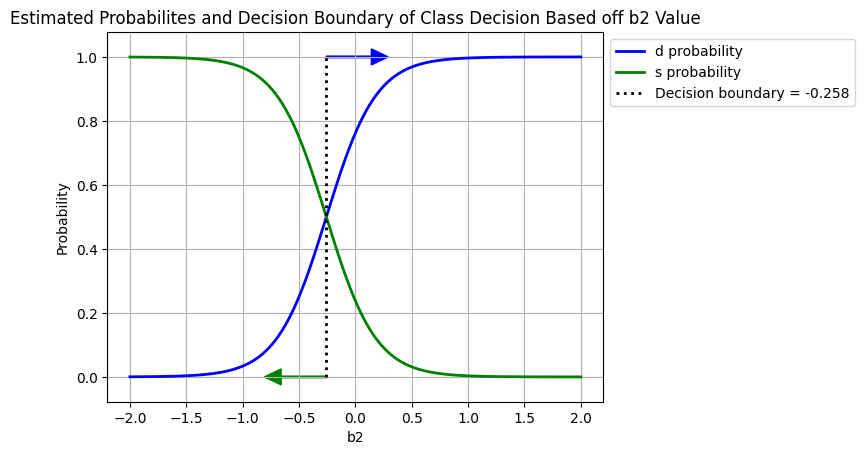

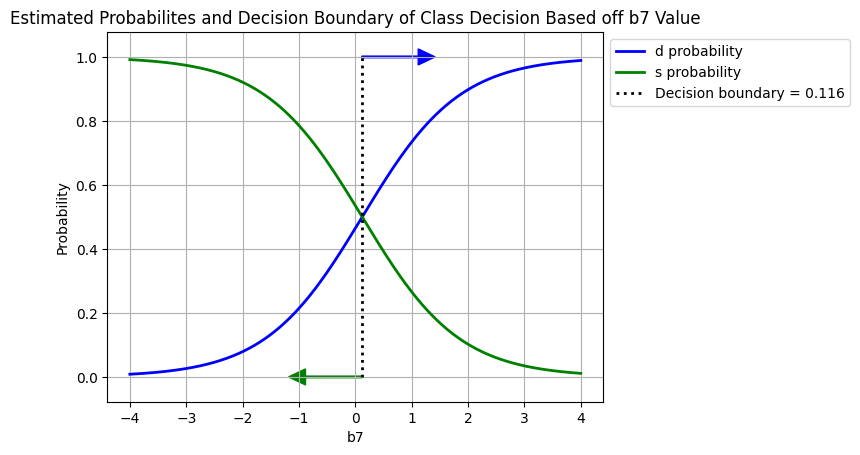

In [41]:
# Set new training data to be of only the b2 and b7 features
train_b2 = training_sd['b2'].array.reshape(-1, 1)
train_b7 = training_sd['b7'].array.reshape(-1, 1)

# Train the logistic regression model based off the b2 and b7 features
logreg_b2 = LogisticRegression(random_state=1)
logreg_b2.fit(train_b2, train_target)

logreg_b7 = LogisticRegression(random_state=1)
logreg_b7.fit(train_b7, train_target)

# Produce a set of b2 and b7 values and associated probabilities for plotting
b2_set = np.linspace(-2, 2, 1000).reshape(-1, 1) # Produce a set of b2 values and reshape to get a column vector
target_prob_b2 = logreg_b2.predict_proba(b2_set)
decision_boundary_b2 = b2_set[target_prob_b2[:, 1] >= 0.5][-1]

b7_set = np.linspace(-4, 4, 1000).reshape(-1, 1) 
target_prob_b7 = logreg_b7.predict_proba(b7_set)
decision_boundary_b7 = b7_set[target_prob_b7[:, 1] >= 0.5][-1]

# Plot the b2 and b7 values and their associated probabilities and decision boundaries
plt.plot(b2_set, target_prob_b2[:, 0], "b-", linewidth=2, label="d probability")
plt.plot(b2_set, target_prob_b2[:, 1], "g-", linewidth=2, label="s probability")
plt.plot([decision_boundary_b2, decision_boundary_b2], [0, 1], "k:", linewidth=2, label="Decision boundary = {:.3f}".format(decision_boundary_b2[0]))
plt.arrow(decision_boundary_b2[0], 1, 0.4, 0, color='b', width=0.005, head_width=0.05, head_length=0.15)
plt.arrow(decision_boundary_b2[0], 0, -0.4, 0, color='g', width=0.005, head_width=0.05, head_length=0.15)
plt.xlabel("b2")
plt.ylabel("Probability")
plt.title("Estimated Probabilites and Decision Boundary of Class Decision Based off b2 Value")
plt.legend(bbox_to_anchor=[1,1])
plt.grid()
plt.show()

plt.plot(b7_set, target_prob_b7[:, 0], "b-", linewidth=2, label="d probability")
plt.plot(b7_set, target_prob_b7[:, 1], "g-", linewidth=2, label="s probability")
plt.plot([decision_boundary_b7, decision_boundary_b7], [0, 1], "k:", linewidth=2, label="Decision boundary = {:.3f}".format(decision_boundary_b7[0]))
plt.arrow(decision_boundary_b7[0], 1, 1, 0, color='b', width=0.005, head_width=0.05, head_length=0.3)
plt.arrow(decision_boundary_b7[0], 0, -1, 0, color='g', width=0.005, head_width=0.05, head_length=0.3)
plt.xlabel("b7")
plt.ylabel("Probability")
plt.title("Estimated Probabilites and Decision Boundary of Class Decision Based off b7 Value")
plt.legend(bbox_to_anchor=[1,1])
plt.grid()
plt.show()

**7b.  Now plot the estimated probabilities and decision boundary for a model considering all features. To build your plot, you must use the score value of the linear part from the logistic regression model in the x-axis. Then, you choose randomly 10 instances of the testing set, add them to your plot, and verify if you have made a right or wrong decision (how would you classify the test instances) regarding the decision boundary of 50%. Comment about your results.**

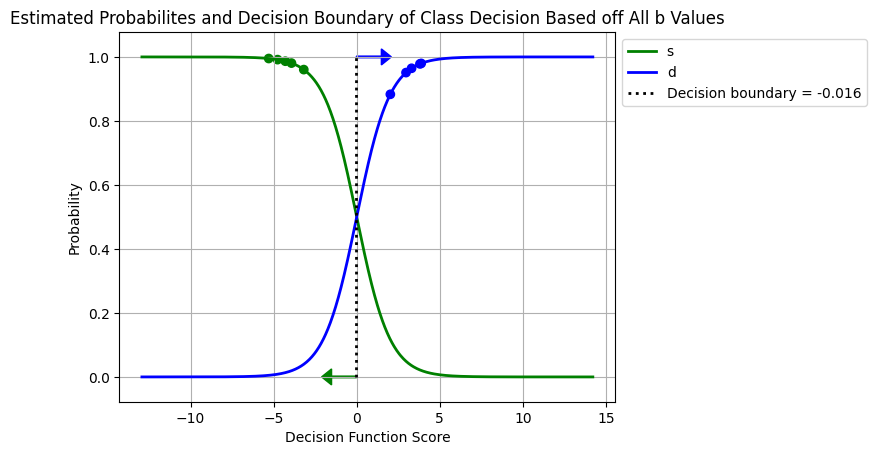

In [42]:
b_rand = np.random.randn(1000, 9)
b_rand = pd.DataFrame(b_rand, columns = train_feature.columns)

# Train the logistic regression model based off all b features
logreg_all_b = LogisticRegression(random_state=1)
logreg_all_b.fit(train_feature, train_target)

# Produce a set of probabilities for plotting
prob_all_b = logreg_all_b.predict_proba(b_rand)

# Produce a set of decision function scores for plotting
dec_fun = logreg_all_b.decision_function(b_rand)

# Producing a data frame of the decision function scores and probabilities
plot_data = pd.DataFrame({'decision_function': dec_fun, 'pred_s': prob_all_b[:, 0], 'pred_d': prob_all_b[:, 1]})
plot_data = plot_data.sort_values(by=['decision_function'])

# Produce a decision boundary for plotting
db_all_b = plot_data['decision_function'][plot_data['pred_s'] >= 0.5].iloc[-1]

# Combine test targets/features into 1 and then extract 10 random samples
test_combined = pd.concat([test_target, test_feature], axis=1)
test_samples = test_combined.sample(10, random_state=7)

# Split the samples into target and feature categories
sample_target = list(test_samples['class'])
sample_feature = test_samples.loc[:, test_samples.columns != 'class']

# Produce the sample decision function and probability scores
sample_dec_fun = logreg_all_b.decision_function(sample_feature)
sample_prob = logreg_all_b.predict_proba(sample_feature)

# Pick the highest probability for each sample
class_prob = []
for sample in sample_prob:
    if sample[0] >= 0.5:
        class_prob.append(sample[0])
    else:
        class_prob.append(sample[1])
        
# Convert class type to colour
class_colours = []
for item in sample_target:
    if item == 's':
        class_colours.append('b')
    else:
        class_colours.append('g')

# Plot the probabilities against decision function
plt.plot(plot_data['decision_function'], plot_data['pred_s'], 'g-', linewidth=2, label='s')
plt.plot(plot_data['decision_function'], plot_data['pred_d'], 'b-', linewidth=2, label='d')
plt.plot([db_all_b, db_all_b], [0, 1], "k:", linewidth=2, label="Decision boundary = {:.3f}".format(db_all_b))
plt.scatter(sample_dec_fun, class_prob, c=class_colours)    
plt.arrow(db_all_b, 1, 1.5, 0, color='b', width=0.005, head_width=0.05, head_length=0.6)
plt.arrow(db_all_b, 0, -1.5, 0, color='g', width=0.005, head_width=0.05, head_length=0.6)
plt.xlabel("Decision Function Score")
plt.ylabel("Probability")
plt.title("Estimated Probabilites and Decision Boundary of Class Decision Based off All b Values")
plt.legend(bbox_to_anchor=[1,1])
plt.grid()
plt.show()

Clearly, all the randomly selected instances were correctly identified, with the blue 'd' class instances falling on the 'd' line and the 's' instances falling on the 's' line.

**8. Plot precision versus recall and comments on the results. How does the performance measure behave? What threshold would you choose and why?**

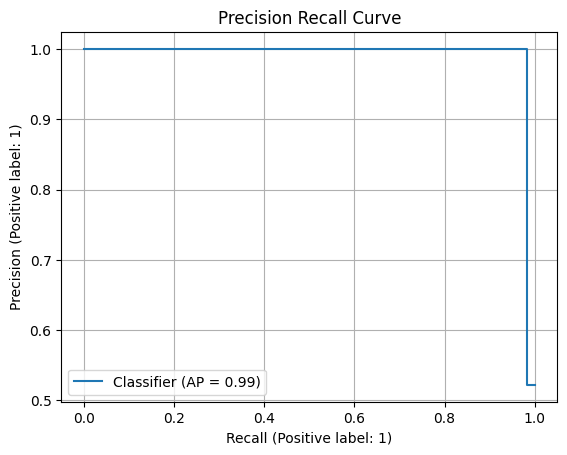

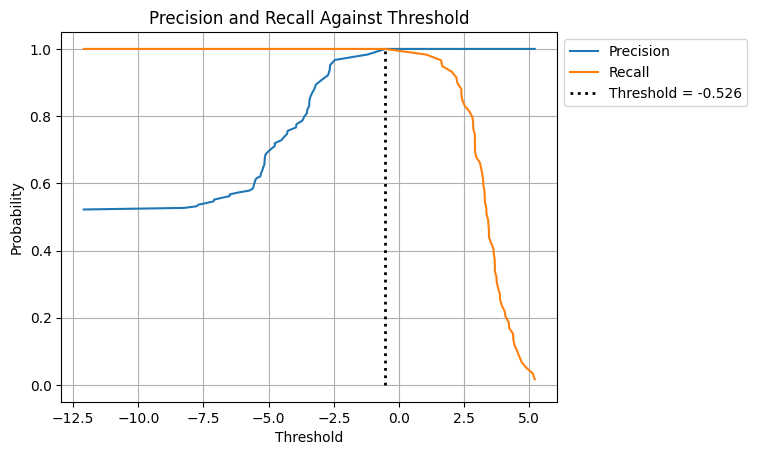

In [43]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Produce estimated probabilities
predicted = logreg_all_b.predict(test_feature)
prc_df = pd.DataFrame({'true': test_target, 'predicted': predicted})
prc_df = prc_df.eq('s').mul(1) # Map values s & d values to 0 & 1

# Plotting PRC from predicted values
prc = PrecisionRecallDisplay.from_predictions(prc_df['true'], prc_df['predicted'])
plt.title("Precision Recall Curve")
plt.grid()
plt.show()

# Produce decision function for the precision recall curve
test_prob = logreg_all_b.decision_function(test_feature)
precision, recall, thresholds = precision_recall_curve(prc_df['true'], test_prob)

index_match = False
index = 0
while index_match is False:
    if precision[index] == recall[index]:
        index_match = True
    else:
        index += 1
threshold_value = thresholds[index]

# Plotting precision and recall against threshold
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot([threshold_value, threshold_value], [0, 1], "k:", linewidth=2, label="Threshold = {:.3f}".format(threshold_value))
plt.xlabel("Threshold")
plt.ylabel("Probability")
plt.title("Precision and Recall Against Threshold")
plt.legend(bbox_to_anchor=[1,1])
plt.grid()
plt.show()

Looking at the precision recall curve, it can be seen that the model performs almost perfectly. The shape is very close to that of the ideal precision recall curve. Looking then at the plot of precision and recall against threshold, we can see that an appropriate threshold value to pick is -0.526 as it maximises the precision and recall (both to a value of 1).

**9. Use the k-nearest neighbours (k-NN) algorithm for the same binary classification task. Try different values of k. Which value did you choose? Why?**

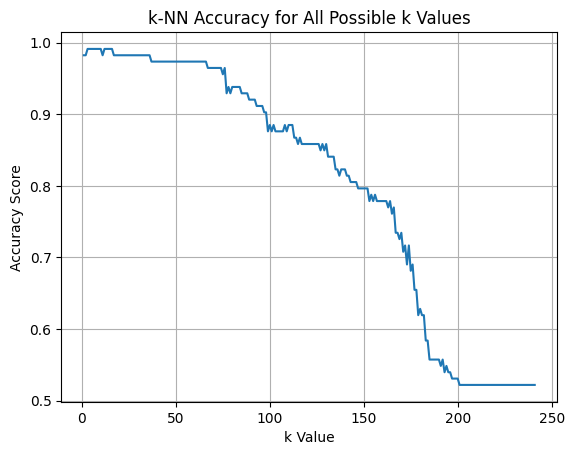

Clearly the highest accuracy occurs in the range of k <= 25, so examining this range more closely:


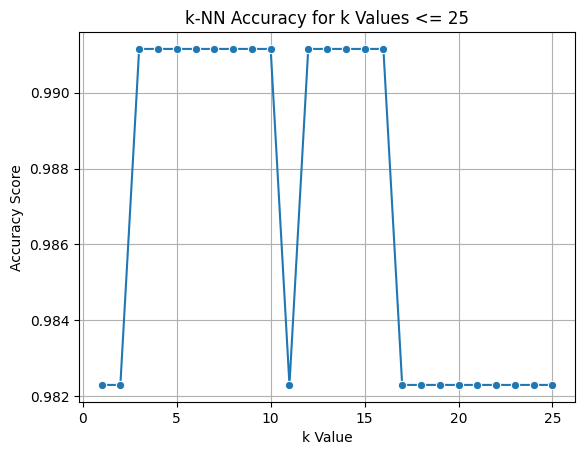

Highest possible accuracy is 0.991 which is true for k values 3 - 16 excluding 11.


In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Create range of k values and empty list of scores to be associated with them
k_values = [i for i in range (1,242)]
scores = []

# Train and score a k-NN algorithm for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_feature, train_target)
    knn_predicted = knn.predict(test_feature)
    score = accuracy_score(test_target, knn_predicted)
    scores.append(score)

# Plot the scores against the associated k values
sns.lineplot(x = k_values, y = scores)
plt.xlabel("k Value")
plt.ylabel("Accuracy Score")
plt.title("k-NN Accuracy for All Possible k Values")
plt.grid()
plt.show()

print("Clearly the highest accuracy occurs in the range of k <= 25, so examining this range more closely:")

# Reduce the range over which k values are plotted to <= 25
sns.lineplot(x = k_values[:25], y = scores[:25], marker = 'o')
plt.xlabel("k Value")
plt.ylabel("Accuracy Score")
plt.title("k-NN Accuracy for k Values <= 25")
plt.grid()
plt.show()

print("Highest possible accuracy is {:.3f} which is true for k values 3 - 16 excluding 11.".format(max(scores)))

Hence, choosing k to be 3 would a good choice as it maximises accuracy score while minimising computational times.

**10. Compare the performances of the two classifiers (Logistic Regression and k-NN) and give a brief
discussion about your experimental results. You should show the confusion matrices, ROC curves
and accuracies of the two classifiers for the testing set. Remember to discuss which threshold for
the Logistic Regression you used to get the results.**

The confusion matrix for the k-NN model is: 
[[54  0]
 [ 1 58]]
The confusion matrix for the logistic regression model is: 
[[54  0]
 [ 1 58]]


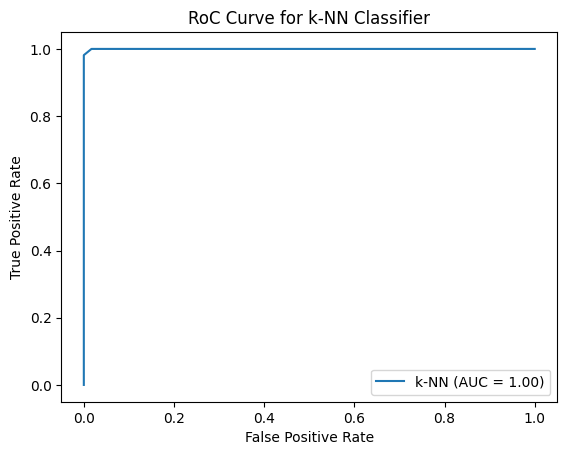

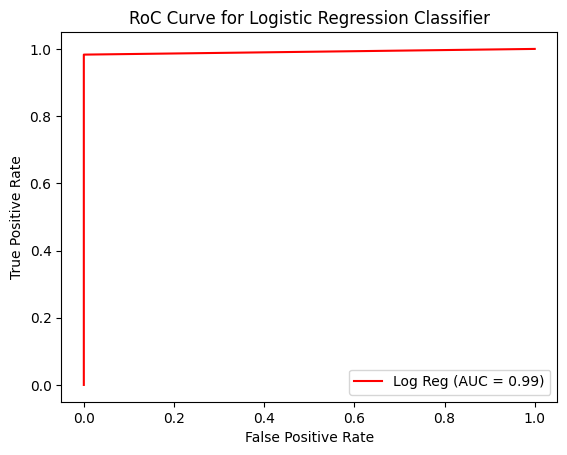

The accuracy score for the k-NN model is 0.991.
The accuracy score for the logistic regression model is 0.991.


In [12]:
from sklearn import metrics

# Create and train the k-NN classifier using the previously established k value
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_feature, train_target)
predicted_knn = knn.predict(test_feature)
prob_knn = knn.predict_proba(test_feature)
pos_prob = prob_knn[:, 0]

# Producing the k-NN confusion matrix
knn_cm = confusion_matrix(test_target, predicted_knn)
print("The confusion matrix for the k-NN model is: \n{}".format(knn_cm))

# Producing the logistic regression confusion matrix
logreg_cm = confusion_matrix(prc_df['true'], prc_df['predicted'])
print("The confusion matrix for the logistic regression model is: \n{}".format(logreg_cm))

# Plotting the k-NN RoC curve
false_positives, true_positives, thresholds = metrics.roc_curve(test_target, pos_prob, pos_label='d')
roc_auc_knn = metrics.auc(false_positives, true_positives)
display_knn = metrics.RocCurveDisplay(fpr=false_positives, tpr=true_positives, roc_auc=roc_auc_knn, estimator_name='k-NN')
display_knn.plot()
plt.title("RoC Curve for k-NN Classifier")

# Plotting the logistic regression RoC curve
fal_pos, tru_pos, thres = metrics.roc_curve(prc_df['true'], prc_df['predicted'])
roc_auc_logreg = metrics.auc(fal_pos, tru_pos)
display_logreg = metrics.RocCurveDisplay(fpr=fal_pos, tpr=tru_pos, roc_auc=roc_auc_logreg, estimator_name='Log Reg')
display_logreg.plot(color='r')
plt.title("RoC Curve for Logistic Regression Classifier")
plt.show()

# Accuracy for k-NN
knn_accuracy = accuracy_score(test_target, predicted_knn)
print("The accuracy score for the k-NN model is {:.3f}.".format(knn_accuracy))

# Accuracy for logistic regression
logreg_accuracy = accuracy_score(prc_df['true'], prc_df['predicted'])
print("The accuracy score for the logistic regression model is {:.3f}.".format(logreg_accuracy))

Using just the test set to examine the performance differences between the two classifiers obviously isn't too useful, as both models return near perfect results. A larger test set or worse training data may assist in differentiating the two, but at the moment it is very difficult to show any difference in performance. Both return the same confusion matrix (which shows only a single false negative) and the same accuracy scores. The RoC curves are very similar, but with the logistic regression model having an AUC of 0.99 to the k-NN model's 1.00. In the logistic regression model, a threshold of -0.526 was used.

**11. Use 3-fold cross-validation and discuss the generalisation capacity of the two classifiers.**

In [13]:
from sklearn.model_selection import cross_validate

# Combining test and train target and features together for k-fold cross validation
combined_feature = pd.concat([train_feature, test_feature])
combined_target = pd.concat([train_target, test_target])

# Cross validation
knn_cv = cross_validate(knn, combined_feature, combined_target, cv=3) # cv = 3 for 3 fold
logreg_cv = cross_validate(logreg_all_b, combined_feature, combined_target, cv=3)

# Printing results
knn_cv_acc = knn_cv['test_score']
knn_cv_av_acc = np.mean(knn_cv_acc)
np.set_printoptions(precision=3)
print("The k-NN model provides scores of {} and an average score of {:.3f}.".format(knn_cv_acc, knn_cv_av_acc))

logreg_cv_acc = logreg_cv['test_score']
logreg_cv_av_acc = np.mean(logreg_cv_acc)
print("The logistic regression model provides scores of {} and an average score of {:.3f}.".format(logreg_cv_acc, logreg_cv_av_acc))

The k-NN model provides scores of [0.941 0.949 0.992] and an average score of 0.960.
The logistic regression model provides scores of [0.915 0.958 0.992] and an average score of 0.955.


The k-NN model appears to generalise slightly better, showing an average score of 0.960 on 3 fold cross validation to the logistic regression models 0.955. This is likely to be expected as the k-NN model is non parametric, while the logistic regression is parametric, meaning the k-NN model makes less assumptions about the relationship between feature and target data.

## 3.3 Tasks - Multiclass Classification
**12. Use the Support Vector Machine Classifier implemented in the sklearn.svm.SVC class to perform multiclass classification using the one-versus-one strategy. You should look at the Scikit-learn API for this class and experiment with two hyperparameters. You should use grid search and 3-fold cross validation to find the optimal values for these two hyperparameters that maximise the classification accuracy.** 

**For other hyperparameters, you can manually set them to some reasonable values. Apart from the Python code, you should explain what you carried out in markdown cells, e.g., which two hyperparameters you have tried? What combination of the hyperparameter values gave the highest classification accuracy?**

In [14]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Splitting into feature and target (class) variables
train_target_mc = training_scaled_df['class']
test_target_mc = testing_scaled_df['class']
train_feature_mc = training_scaled_df.loc[:, training_scaled_df.columns != 'class']
test_feature_mc = testing_scaled_df.loc[:, testing_scaled_df.columns != 'class']

# Creating OvO classifier and training it
ovo_clf = OneVsOneClassifier(SVC(random_state=1))
ovo_clf.fit(train_feature_mc, train_target_mc)

# Grid search on C & gamma hyperparameters to find optimal values with 3 fold cross validation
grid_param = {'C': np.arange(1, 1.1, 0.005), 'gamma': np.arange(0, 0.2, 0.005)}
grid = GridSearchCV(SVC(), grid_param, cv=3)
grid.fit(train_feature_mc, train_target_mc)
best_vals = grid.best_estimator_
print("The best hyperparameter values are: \nC = {:.3f} \ngamma = {:.3f}\n".format(best_vals.C, best_vals.gamma))

# Testing accuracy with tuned hyperparameters
ovo_tuned = OneVsOneClassifier(SVC(C=best_vals.C, gamma=best_vals.gamma, random_state=1))
ovo_tuned.fit(train_feature_mc, train_target_mc)
ovo_predicted = ovo_tuned.predict(test_feature_mc)
ovo_accuracy = accuracy_score(test_target_mc, ovo_predicted)
print("Which gives a classification accuracy of {:.3f}.".format(ovo_accuracy))

The best hyperparameter values are: 
C = 1.015 
gamma = 0.125

Which gives a classification accuracy of 0.838.


Testing the C and gamma hyperparameters, the best values were found to be 1.015 and 0.125 respectively to give a classification accuracy of 0.838.

**13. Use the Softmax Regression and the k-NN algorithm (try with some different values of k) on the same classification tasks and comment about the results of the three techniques (SVM, Softmax Regression and k-NN).**

Softmax regression model has a classification accuracy of 0.859.


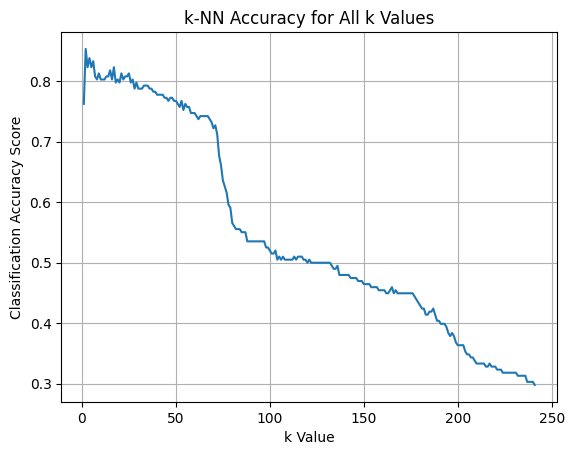

The maximum kNN classification accuracy is 0.854 for k = 2.


In [15]:
# Creating softmax regression model and testing to find classification accuracy
soft_reg = LogisticRegression(multi_class='multinomial', random_state=1)
soft_reg.fit(train_feature_mc, train_target_mc)
soft_reg_predicted = soft_reg.predict(test_feature_mc)
ovo_accuracy = accuracy_score(test_target_mc, soft_reg_predicted)
print("Softmax regression model has a classification accuracy of {:.3f}.".format(ovo_accuracy))

# Create kNN algorithm and test over a variety of k values to find optimal accuracy.

# Create range of k values and empty list of scores to be associated with them
k_values = [i for i in range (1,242)]
k_scores = []

# Train and score a k-NN algorithm for each k value
for k in k_values:
    kNN = KNeighborsClassifier(n_neighbors = k)
    kNN.fit(train_feature_mc, train_target_mc)
    kNN_predicted = kNN.predict(test_feature_mc)
    k_score = accuracy_score(test_target_mc, kNN_predicted)
    k_scores.append(k_score)

# Plot the k values against their associated classification accuracy
sns.lineplot(x=k_values, y=k_scores)
plt.xlabel("k Value")
plt.ylabel("Classification Accuracy Score")
plt.title("k-NN Accuracy for All k Values")
plt.grid()
plt.show()

# Determine best kNN accuracy
best_k_score = max(k_scores)
best_k_location = k_scores.index(best_k_score)
print("The maximum kNN classification accuracy is {:.3f} for k = {}.".format(best_k_score, k_values[best_k_location]))

The SVM, softmax regression and k-NN models provided maximum accuracies of 0.838, 0.859 and 0.854 respectively. It can be seen then that the softmax regression provided the highest classification accuracy, while the SVM provided the lowest. 

## Part 2 - Implementing the k-nearest neighbours (k-NN) algorithm to do regression 
**1. Randomly split the data into a training set (say 80%) and a test set (say 20%), apply the k-NN regressor, and evaluate how good the regressor performs by computing the root mean square error (RMSE) of the predicted house prices of the test set.**

In [16]:
from sklearn.datasets import fetch_california_housing

# Fetching the Californian Housing data from sklearn and converting to a dataframe
housing_data = fetch_california_housing(as_frame=True)
housing_data = pd.concat([housing_data.data, housing_data.target], axis=1)

# Checking for any nan data
nan_check = housing_data.isnull().values.any() 
print("Are there NaN values in the Californian housing data set?\n{}".format(nan_check))

Are there NaN values in the Californian housing data set?
False


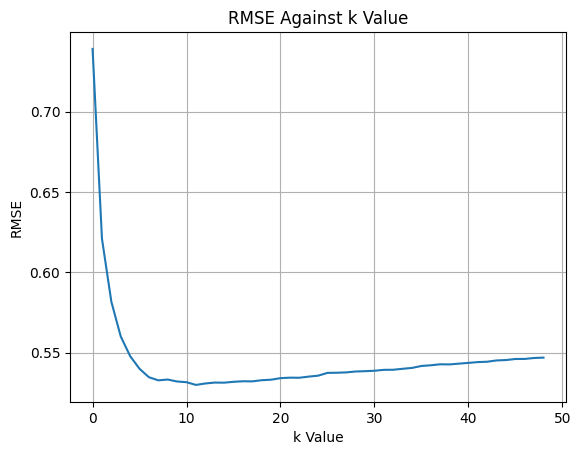

The minimum RMSE is 0.530 for k = 12.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Break into testing and training data
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=1)

# Standard scaling test and training sets and assigning them to a new array
standard_scaler = StandardScaler()
train_scaled = standard_scaler.fit_transform(train_set)
test_scaled = standard_scaler.fit_transform(test_set)

# Converting to a dataframe
train_scaled_df = pd.DataFrame(train_scaled, columns = housing_data.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns = housing_data.columns)

# Splitting into feature and target sets
train_target = train_scaled_df['MedHouseVal']
test_target = test_scaled_df['MedHouseVal']
train_feature = train_scaled_df.loc[:, train_scaled_df.columns != 'MedHouseVal']
test_feature = test_scaled_df.loc[:, test_scaled_df.columns != 'MedHouseVal']

# Construct and find the RMSE value for various k valued k-NN regressors
k_num = [i for i in range (1,50)]
rms_values = []
for k_val in k_num:
    k_reg = KNeighborsRegressor(n_neighbors=k_val)
    k_reg.fit(train_feature, train_target)
    predicted_val = k_reg.predict(test_feature)
    rms = mean_squared_error(test_target, predicted_val, squared=False) # Squared=False returns RMSE
    rms_values.append(rms)

# Plotting RMSE against k
plt.plot(rms_values)
plt.title("RMSE Against k Value")
plt.xlabel("k Value")
plt.ylabel("RMSE")
plt.grid()
plt.show()

# Returning optimal k value for minimum RMSE
rmse_min = min(rms_values)
best_k = rms_values.index(rmse_min)
print("The minimum RMSE is {:.3f} for k = {}.".format(rmse_min, k_num[best_k]))

Clearly the model works reasonably well, returning a minimum RMSE of 0.530. That being said, there is some obvious room for improvement, as a RMSE of < 0.5 is generally desired.

**2. Experiment with a selection of columns (avoid those columns that contain text) from the dataset to form your feature vectors. The number of columns that you choose would become the dimension n of your feature vectors. Note that you would need to do some normalization so that your data is not dominated by some columns that have large magnitudes.**

Correlations to the median house value in the training set are: 
MedHouseVal        1.000
MedInc             0.688
AveRooms           0.147
HouseAge           0.106
bedrooms_ratio    -0.002
people_per_room   -0.009
AveOccup          -0.022
Population        -0.024
AveBedrms         -0.042
Longitude         -0.051
Latitude          -0.139
lat_long          -0.492
Name: MedHouseVal, dtype: float64

Removing each of the 5 worst correlated features, the associated RMSE values are:
    Column_removed  RMSE_value
3       Population       0.495
1  people_per_room       0.497
0   bedrooms_ratio       0.497
4        AveBedrms       0.505
2         AveOccup       0.544

RMSE using all columns is 0.505.

The columns to be removed are: 
['Population', 'people_per_room', 'bedrooms_ratio']


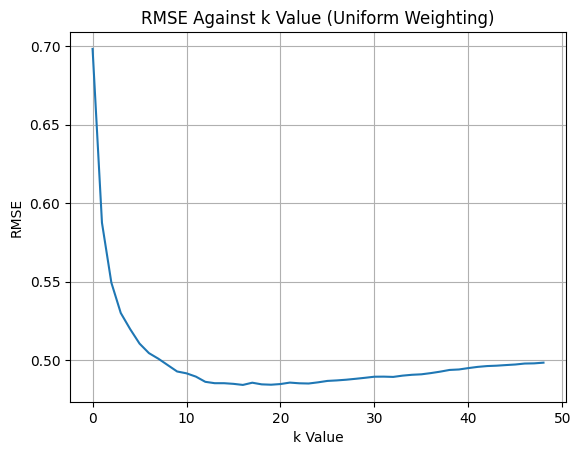

The minimum RMSE is 0.484 for k = 17.


In [18]:
# Creating some potentially more relevant feature vectors in the training and testing features
train_feature["bedrooms_ratio"] = train_feature["AveBedrms"] / train_feature["AveRooms"]
train_feature["people_per_room"] = train_feature["Population"] / train_feature["AveRooms"]
train_feature["lat_long"] = train_feature["Longitude"] + train_feature["Latitude"]

test_feature["bedrooms_ratio"] = test_feature["AveBedrms"] / test_feature["AveRooms"]
test_feature["people_per_room"] = test_feature["Population"] / test_feature["AveRooms"]
test_feature["lat_long"] = test_feature["Longitude"] + test_feature["Latitude"]

# Making a list of feature columns
feat_col = train_feature.columns

# Scaling the new columns
train_feature = standard_scaler.fit_transform(train_feature)
test_feature = standard_scaler.fit_transform(test_feature)
train_feature = pd.DataFrame(train_feature, columns = feat_col)
test_feature = pd.DataFrame(test_feature, columns = feat_col)

# Creating a combined training set for correlation 
total_train = pd.concat([train_target, train_feature], axis=1)

# Determining correlations between features and target
correlations = total_train.corr()
house_val_corr = correlations["MedHouseVal"].sort_values(ascending=False)
pd.set_option("display.precision", 3)
print("Correlations to the median house value in the training set are: \n{}\n".format(house_val_corr))

# Making a list of the features with the worst correlations
corr_sorted = house_val_corr.abs().sort_values()
worst_corr = corr_sorted[:5] # Picking the 5 worst correlations
worst_corr = pd.DataFrame(worst_corr)
worst_corr_features = worst_corr.axes[0].tolist()

# Testing if the removal of columns reduces rmse
rms_values = []
for feature_column in worst_corr_features:
    train_no_col = train_feature.drop([feature_column], axis=1)
    test_no_col = test_feature.drop([feature_column], axis=1)
    k_feat = KNeighborsRegressor(n_neighbors=12)
    k_feat.fit(train_no_col, train_target)
    predicted_val = k_feat.predict(test_no_col)
    rms = mean_squared_error(test_target, predicted_val, squared=False) # Squared=False returns RMSE
    rms_values.append(rms)

# Turning results into a data frame
col_rms = pd.DataFrame({'Column_removed': worst_corr_features, 'RMSE_value': rms_values})
col_rms = col_rms.sort_values(by=['RMSE_value'])
print("Removing each of the 5 worst correlated features, the associated RMSE values are:\n{}".format(col_rms))

# Getting RMSE for all columns
k_all_feat = KNeighborsRegressor(n_neighbors=12)
k_all_feat.fit(train_feature, train_target)
all_feat_pred = k_all_feat.predict(test_feature)
all_feat_rmse = mean_squared_error(test_target, predicted_val, squared=False)
print("\nRMSE using all columns is {:.3f}.\n".format(all_feat_rmse))

# Determining which columns should be removed
col_rms_remove = col_rms
col_rms_remove = col_rms_remove[col_rms_remove.RMSE_value < all_feat_rmse]
remove_features = list(col_rms_remove.loc[:, 'Column_removed'])
print("The columns to be removed are: \n{}".format(remove_features))

# Setting some new variables to remove columns from
train_reduced = train_feature
test_reduced = test_feature

# Removing the columns that increase RMSE
for feature in remove_features:
    train_reduced = train_reduced.drop(feature, axis=1)
    test_reduced = test_reduced.drop(feature, axis=1)

# Construct and find the RMSE value for various k valued k-NN regressors
k_num = [i for i in range (1,50)]
rms_values = []
for k_val in k_num:
    k_reg = KNeighborsRegressor(n_neighbors=k_val)
    k_reg.fit(train_reduced, train_target)
    predicted_val = k_reg.predict(test_reduced)
    rms = mean_squared_error(test_target, predicted_val, squared=False) # Squared=False returns RMSE
    rms_values.append(rms)

# Plotting RMSE against k
plt.plot(rms_values)
plt.title("RMSE Against k Value (Uniform Weighting)")
plt.xlabel("k Value")
plt.ylabel("RMSE")
plt.grid()
plt.show()

# Returning optimal k value for minimum RMSE
rmse_min = min(rms_values)
best_k = rms_values.index(rmse_min)
print("The minimum RMSE is {:.3f} for k = {}.".format(rmse_min, k_num[best_k]))

3 new columns were added (bedrooms ratio, people per room and the sum of the latitude and longitudes) before then checking if removing the columns with the worst correlations to the median house value. The population, people per room and bedrooms ratio were then removed to reduce the RMSE. This reduced the minimum RMSE from 0.530 in the previous part to 0.484, now getting us to an RMSE < 0.5.

**3. Try also setting the parameter weights to ‘uniform’ (this is equivalent to setting wi = 1/k, ∀i) and to ‘distance’ (this is equivalent to setting wi = 1/(d(X(i), Xtest) + ε)) and then compare the root mean squared errors (RMSEs) of their predictions.**

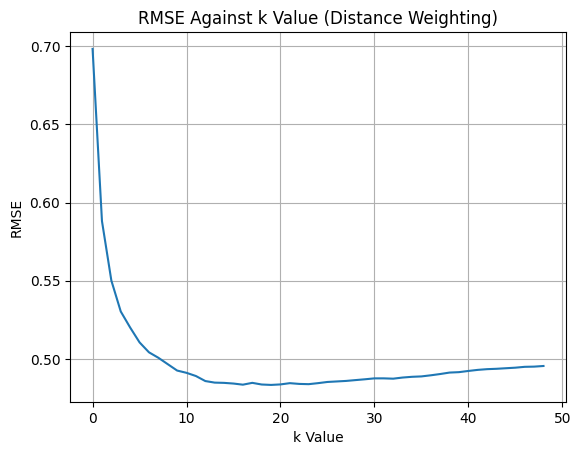

The minimum RMSE is 0.483 for k = 20.


In [19]:
# Construct and find the RMSE value for various k valued k-NN regressors
k_num = [i for i in range (1,50)]
rms_values = []
for k_val in k_num:
    k_reg = KNeighborsRegressor(n_neighbors=k_val, weights='distance')
    k_reg.fit(train_reduced, train_target)
    predicted_val = k_reg.predict(test_reduced)
    rms = mean_squared_error(test_target, predicted_val, squared=False) # Squared=False returns RMSE
    rms_values.append(rms)

# Plotting RMSE against k
plt.plot(rms_values)
plt.title("RMSE Against k Value (Distance Weighting)")
plt.xlabel("k Value")
plt.ylabel("RMSE")
plt.grid()
plt.show()

# Returning optimal k value for minimum RMSE
rmse_min = min(rms_values)
best_k = rms_values.index(rmse_min)
print("The minimum RMSE is {:.3f} for k = {}.".format(rmse_min, k_num[best_k]))

Changing the parameter weights from uniform (default) in the previous part to distance, the RMSE dropped from 0.484 to 0.483.